<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/blob/main/Desafio3_completo_em_squad_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Squad: Mae C. Jemison

Integrantes:
*   Amparo Silvia Pastor Castillo Runschka
*   Cristiana Alves Moura
*   Fernanda Monello Correa Manoel
*   Larissa Monique de Sousa Rodrigues
*   Raquel Nunes Matos Rios
*   Vanelle Rabelo do Nascimento
*   Vanessa Lima Paraizo
*   Verônica Lima Costa


## Desafio 1: Entendendo o consumidor.
Suponha que você trabalha em uma empresa de streaming e, com as
mudanças no mercado, a equipe de marketing suspeita que o perfil dos
clientes que cancelaram a assinatura mudou. Eles pediram sua ajuda para
entender:

1.   Se o perfil dos clientes que cancelam hoje é diferente do perfil dos clientes que cancelaram anteriormente.
Dica: Fazer um comparativo dos clientes que cancelaram nos últimos 6
meses com os que cancelaram a mais de 24 meses.
2.   Quais são as principais diferenças entre os perfis, para que possam criar
estratégias mais eficazes de retenção.
Para isso, eles fornecem a base de dados clientes.csv, que contém
informações anonimizadas sobre os clientes ao longo do tempo.


## Etapa de ETL - Extração, Transformação e Limpeza dos dados

###Importações e inserção do dataset:

[Data Set Clientes](https://docs.google.com/spreadsheets/d/12umlCuYSIC4gSiBwqn1JSI1Ey3I56yKHkc4Ni8bE3yg/edit?gid=1990017453#gid=1990017453)

[Canva da Apresentação](https://www.canva.com/design/DAGigNR1b2Q/rpeGuN1A2kFYUnMU9NP8Mg/edit)


In [2]:
# Importando todas as bibliotecas utilizadas no desafio:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística e testes de hipóteses
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Cálculo de tamanho amostral
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_confint

# Configuração para melhor visualização dos gráficos
sns.set_theme(style="whitegrid")
plt.style.use("ggplot")

url = 'https://docs.google.com/spreadsheets/d/12umlCuYSIC4gSiBwqn1JSI1Ey3I56yKHkc4Ni8bE3yg/edit?gid=1990017453#gid=1990017453'
url = url.replace('/edit?gid=', '/export?format=csv&gid=')
df = pd.read_csv(url)

# Remover colunas desnecessárias
df = df.drop(columns=['cliente_id'])  # Exclui a coluna 'cliente_id', pois não é relevante para a análise

# Criar categorias de idade
#bins = [18, 30, 45, 60, 80]  # Define os intervalos das faixas etárias
#labels = ['18-29', '30-44', '45-59', '60+']  # Define os rótulos correspondentes para cada faixa etária
#df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)# A função `pd.cut` categoriza a idade dos clientes com base nos intervalos definidos

# Criar métrica de engajamento
df['engajamento'] = df['frequencia_uso_mensal'] / df['tempo_assinatura_meses'] # Calcula o nível de engajamento do cliente, dividindo a frequência de uso mensal pelo tempo total de assinatura
# Quanto maior o valor, maior o engajamento do usuário com o serviço ao longo do tempo

# Converter a coluna 'cancelou' para tipo booleano (1 = cancelado, 0 = ativo)
df['cancelou'] = df['cancelou'].map({0: 1, 1: 0}).astype(int) # Agora 0 significa "Cancelado" e 1 significa "Ativo"

# Verificar as transformações
print(df.head(10))

# Salvar o dataset transformado
#df.to_csv('dados_transformados.csv', index=False)# Salva o DataFrame transformado em um arquivo CSV, sem incluir o índice, para análise posterior


   idade  tempo_assinatura_meses  frequencia_uso_mensal        regiao  \
0     56                      30                     27  Centro-Oeste   
1     69                      11                      2         Norte   
2     46                      58                     21           Sul   
3     32                      55                      1         Norte   
4     60                      28                     28           Sul   
5     25                      25                     15           Sul   
6     38                      39                      1      Nordeste   
7     56                      33                      5           Sul   
8     36                       1                     28       Sudeste   
9     40                      57                     29  Centro-Oeste   

   mensalidade  cancelou  engajamento  
0        96.03         0     0.900000  
1        91.22         1     0.181818  
2        56.45         1     0.362069  
3        69.61         1     0.01818

### Etapa 1: Análise de Distribuição e Perfis


* Analisar a distribuição de idade, tempo de assinatura, frequência de uso e região dos clientes que cancelaram nos últimos 6 meses e dos que cancelaram há mais de 24 meses.
*  Identificar e descrever as principais diferenças entre os perfis dos clientes nesses dois períodos.

In [ ]:
df.head()

,idade,tempo_assinatura_meses,frequencia_uso_mensal,regiao,mensalidade,cancelou,engajamento
0,56,30,27,Centro-Oeste,96.03,0,0.900000
1,69,11,2,Norte,91.22,1,0.181818
2,46,58,21,Sul,56.45,1,0.362069
3,32,55,1,Norte,69.61,1,0.018182
4,60,28,28,Sul,42.19,1,1.000000


In [ ]:
df.describe()

,idade,tempo_assinatura_meses,frequencia_uso_mensal,mensalidade,cancelou,engajamento
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,45.260000,30.890000,15.980000,59.129000,0.720000,1.468962
std,16.040852,17.679102,8.843679,23.318007,0.450126,3.334244
min,18.000000,1.000000,1.000000,21.160000,0.000000,0.018182
25%,31.750000,16.750000,8.000000,38.807500,0.000000,0.256944
50%,45.000000,32.000000,17.000000,57.710000,1.000000,0.500000
75%,59.000000,48.000000,23.000000,79.680000,1.000000,1.168478
max,74.000000,59.000000,29.000000,99.980000,1.000000,28.000000


In [ ]:
#fazer uma copia da base de dados com clientes que cancelaram nos ultimos 6 meses, e deixando só as columnas que precisamos analisar
df_menor_6 = df[(df['tempo_assinatura_meses'] <= 6) & (df['cancelou'] == 1)].drop(columns=['mensalidade', 'cancelou','engajamento'])

df_menor_6.head(5)
df_menor_6.describe()

,idade,tempo_assinatura_meses,frequencia_uso_mensal
count,15.000000,15.000000,15.000000
mean,49.933333,3.133333,18.866667
std,16.485780,1.726543,6.151268
min,25.000000,1.000000,7.000000
25%,35.500000,2.000000,15.500000
50%,54.000000,3.000000,19.000000
75%,64.000000,4.500000,23.000000
max,72.000000,6.000000,28.000000


<Figure size 640x480 with 0 Axes>

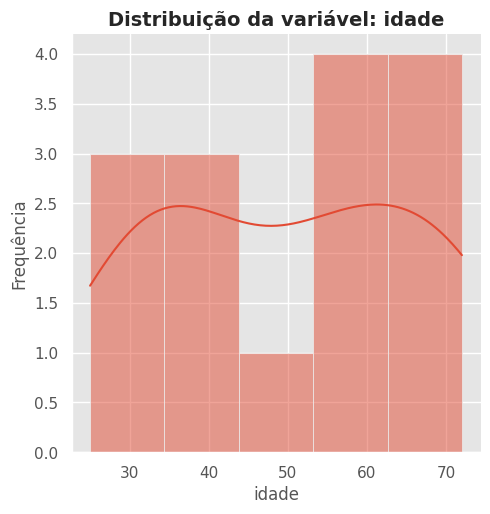

<Figure size 640x480 with 0 Axes>

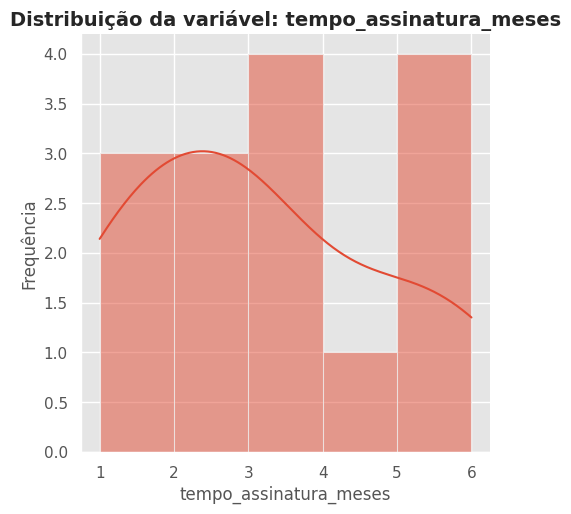

<Figure size 640x480 with 0 Axes>

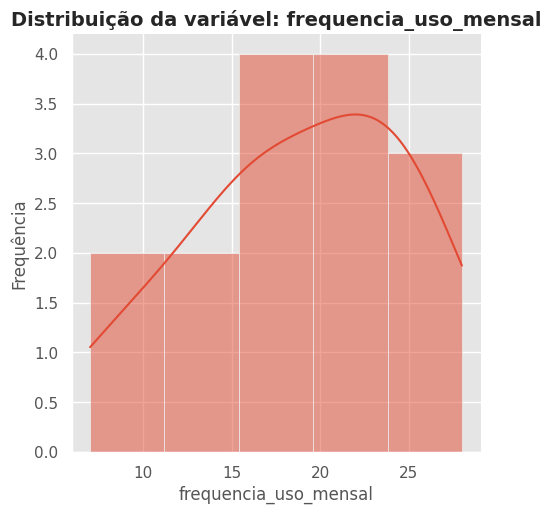

<Figure size 640x480 with 0 Axes>

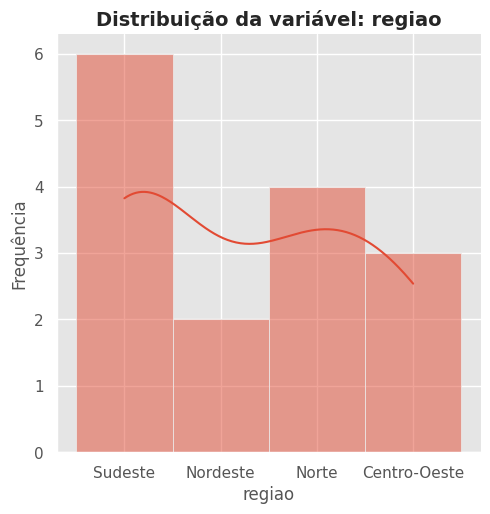

In [ ]:
#criar histograma para cada columna para ver a distribuição
# create distplots
for column in df_menor_6.columns:
    plt.figure()
    sns.displot(data = df_menor_6 , x = column, kde= True)


# Melhorando os detalhes visuais
    plt.title(f"Distribuição da variável: {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequência", fontsize=12)

    # Mostra o gráfico
    plt.show()

In [ ]:
#fazer uma copia da base de dados com clientes que cancelaram com mais de 2 anos de assinatura, e deixando só as columnas que precisamos analisar
df_maior_24 = df[(df['tempo_assinatura_meses'] > 24) & (df['cancelou'] == 1)].drop(columns=['mensalidade', 'cancelou','engajamento'])

df_maior_24.head(5)
df_maior_24.describe()

,idade,tempo_assinatura_meses,frequencia_uso_mensal
count,92.000000,92.00000,92.000000
mean,44.097826,42.25000,14.934783
std,15.790566,10.32933,9.095107
min,18.000000,25.00000,1.000000
25%,31.000000,33.00000,6.750000
50%,43.000000,41.00000,16.000000
75%,57.500000,52.00000,22.000000
max,74.000000,59.00000,29.000000


<Figure size 640x480 with 0 Axes>

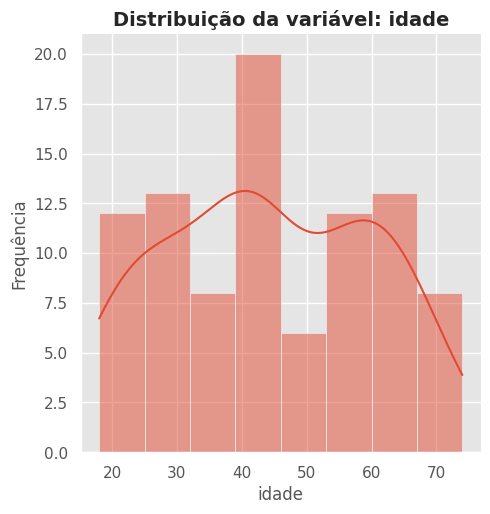

<Figure size 640x480 with 0 Axes>

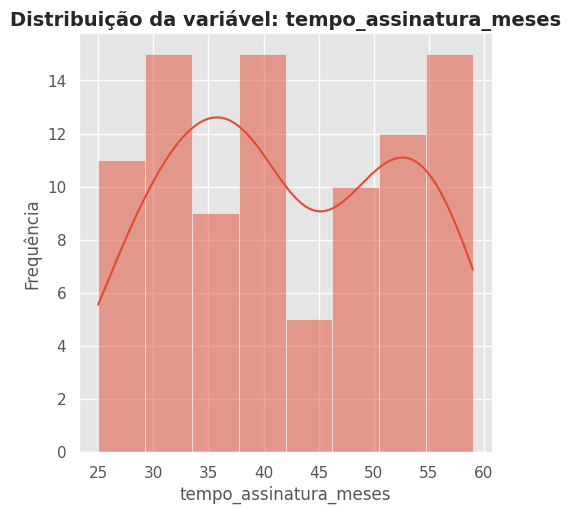

<Figure size 640x480 with 0 Axes>

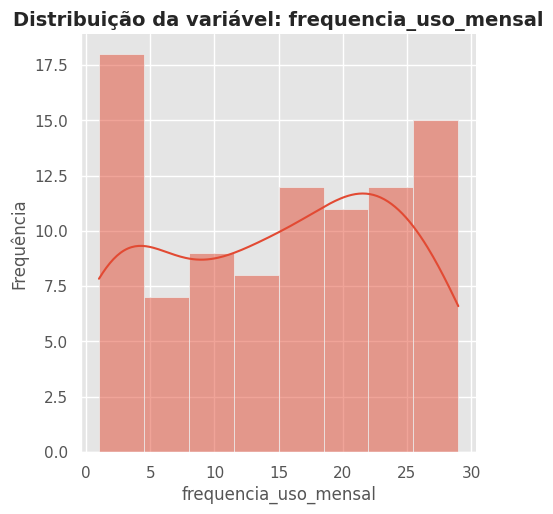

In [ ]:
#criar histograma para cada columna para ver a distribuição

# create distplots
for column in df_maior_24.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data = df_maior_24 , x = column, kde= True)


# Melhorando os detalhes visuais
    plt.title(f"Distribuição da variável: {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequência", fontsize=12)

    # Mostra o gráfico
    plt.show()

### Etapa 2: Visualização de Dados

*   Criar gráficos para visualizar padrões dos clientes que mantêm e cancelam a assinatura (histogramas, boxplots, gráficos de dispersão).
*   Destacar insights visuais e possíveis tendências nos dados analisados.



In [ ]:
# Implementação do código referente à etapa 2:
from datetime import datetime, timedelta

# Supondo que o mês atual seja 60 para simplificação
mes_atual = 60

# Filtrar clientes que cancelaram recentemente e há muito tempo
recentes = df[(df['cancelou'] == 1) & (df['tempo_assinatura_meses'] >= mes_atual - 6)]
antigos = df[(df['cancelou'] == 1) & (df['tempo_assinatura_meses'] < mes_atual - 24)]

# Verificar quantidades
print(f"Clientes recentes: {len(recentes)}")
print(f"Clientes antigos: {len(antigos)}")


Clientes recentes: 19
Clientes antigos: 80


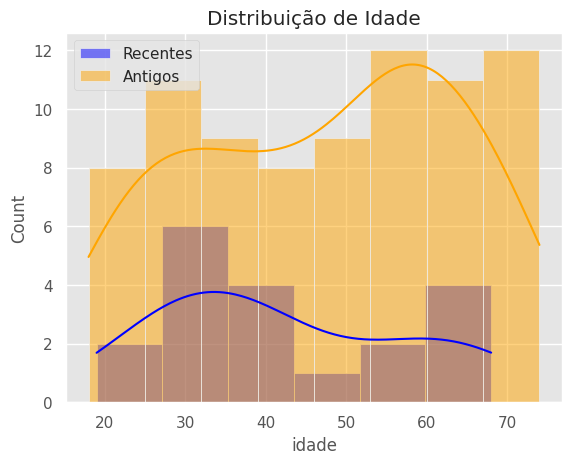

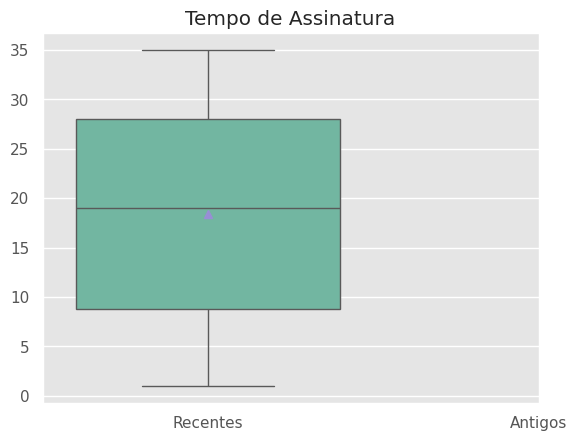

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparar idade
sns.histplot(recentes['idade'], color='blue', label='Recentes', kde=True)
sns.histplot(antigos['idade'], color='orange', label='Antigos', kde=True)
plt.title('Distribuição de Idade')
plt.legend()
plt.show()

# Comparar tempo de assinatura
sns.boxplot(data=[recentes['tempo_assinatura_meses'], antigos['tempo_assinatura_meses']],
            palette='Set2', showmeans=True)
plt.xticks([0, 1], ['Recentes', 'Antigos'])
plt.title('Tempo de Assinatura')
plt.show()

## Principais Insights Etapa 2
1 -IDADE
*   Recentes: Mais concentrados entre 30 a 50 anos.
*   Antigos:Predominância de idades acima de 50 anos.
*  Estratégia: Personalizar ações para jovens adultos com maior probabilidade de cancelamento.

2- TEMPO DE ASSINATURA.
*   Recentes:Cancelamentos após 6 a 18 meses de assinatura.
*   Antigos: Maior tempo de assinatura, geralmente acima de 30 meses.
*   Estratégia: Implementar programas de retenção nos primeiros anos de assinatura.

3 - FREQUÊNCIA DE USO MENSAL
*   Recentes:Maior frequência de uso antes do cancelamento (média > 20 usos/mês).
*   Antigos:Menor frequência de uso.
*   Estratégia:Investigar insatisfação entre clientes com alto uso e ajustar o custo-benefício.

4 - REGIÕES
*    Recentes:Cancelamentos concentrados em Nordeste e Norte.
*    Antigos: Maioria das regiões Sul e Sudeste.
*    Estratégia: Campanhas regionais adaptadas às necessidades locais.

### Etapa 3: Análise de Distribuição e Perfis


* Aplicar testes estatísticos (ex.: teste qui-quadrado, teste t, regressão logística) para verificar se há relação significativa entre o tempo de assinatura e a taxa de cancelamento.
* Interpretar os resultados e explicar o impacto desses achados na retenção de clientes.

#Definir a hipótese do teste

Queremos testar se o tempo de assinatura influencia o cancelamento.

Hipótese nula (H₀): O tempo de assinatura não tem relação significativa com o cancelamento.

Hipótese alternativa (H₁): O tempo de assinatura tem relação significativa com o cancelamento.

In [3]:
# Implementação do código referente à etapa 3:
# Teste t de Student (se o tempo de assinatura dos cancelados e dos ativos for normalmente distribuído)

from scipy.stats import ttest_ind

# Separar os grupos
tempo_ativos = df[df["cancelou"] == 0]["tempo_assinatura_meses"]
tempo_cancelados = df[df["cancelou"] == 1]["tempo_assinatura_meses"]

# Teste t
t_stat, p_value = ttest_ind(tempo_ativos, tempo_cancelados, equal_var=False)

print(f"Teste t de Student:")
print(f"Estatística t = {t_stat:.4f}")
print(f"Valor p = {p_value:.4f}")

# Interpretar o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H₀: O tempo de assinatura tem relação significativa com o cancelamento.")
else:
    print("Não rejeitamos H₀: Não há evidências suficientes para afirmar que o tempo de assinatura influencia o cancelamento.")



Teste t de Student:
Estatística t = -0.5900
Valor p = 0.5566
Não rejeitamos H₀: Não há evidências suficientes para afirmar que o tempo de assinatura influencia o cancelamento.


In [4]:
#Teste de Mann-Whitney (se os dados não forem normalmente distribuídos)

from scipy.stats import mannwhitneyu

# Teste de Mann-Whitney
u_stat, p_value_mw = mannwhitneyu(tempo_ativos, tempo_cancelados, alternative="two-sided")

print(f"\nTeste de Mann-Whitney:")
print(f"Estatística U = {u_stat:.4f}")
print(f"Valor p = {p_value_mw:.4f}")

if p_value_mw < alpha:
    print("Rejeitamos H₀: O tempo de assinatura tem relação significativa com o cancelamento.")
else:
    print("Não rejeitamos H₀: Não há evidências suficientes para afirmar que o tempo de assinatura influencia o cancelamento.")



Teste de Mann-Whitney:
Estatística U = 3799.5000
Valor p = 0.5278
Não rejeitamos H₀: Não há evidências suficientes para afirmar que o tempo de assinatura influencia o cancelamento.


In [5]:
#Regressão Logística (para medir o impacto do tempo de assinatura na probabilidade de cancelamento).

import statsmodels.api as sm

# Definir variável dependente (y) e independente (X)
X = df["tempo_assinatura_meses"]
y = df["cancelou"]

# Adicionar uma constante para a regressão
X = sm.add_constant(X)

# Criar o modelo logístico
modelo = sm.Logit(y, X)
resultado = modelo.fit()

# Exibir os resultados
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.592009
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               cancelou   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                0.001593
Time:                        01:06:48   Log-Likelihood:                -118.40
converged:                       True   LL-Null:                       -118.59
Covariance Type:            nonrobust   LLR p-value:                    0.5388
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7770      0.312      2.490      0.013       0.165      

Interpretação do coeficiente do tempo de assinatura

O coeficiente -0.0055 indica que quanto maior o tempo de assinatura, menor a probabilidade de cancelamento.

Mas o p-value = 0.539 significa que essa relação não é estatisticamente significativa.

📌 O tempo de assinatura, isoladamente, não tem um impacto estatisticamente significativo sobre o cancelamento (p > 0.05).

In [6]:
# Testes com outras variáveis, como: tempo de assinatura. frequência de uso, mensalidade e região
import pandas as pd
import statsmodels.api as sm

# Garantir que a variável 'regiao' seja numérica
df["regiao"] = df["regiao"].astype("category").cat.codes

# Definir variáveis independentes e dependentes
X = df[["tempo_assinatura_meses", "frequencia_uso_mensal", "mensalidade", "regiao"]]
y = df["cancelou"].astype(int)  # Garantir que 'cancelou' seja numérico

# Adicionar constante para a regressão
X = sm.add_constant(X)

# Criar o modelo logístico
modelo = sm.Logit(y, X)
resultado = modelo.fit()

# Criar uma tabela formatada dos resultados
tabela_resultados = pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": resultado.params.round(4),
    "Erro Padrão": resultado.bse.round(4),
    "z-valor": resultado.tvalues.round(4),
    "p-valor": resultado.pvalues.round(4)
})

# Exibir a tabela formatada
from IPython.display import display

print("Resultados da Regressão Logística:")
display(tabela_resultados)

Optimization terminated successfully.
         Current function value: 0.589282
         Iterations 5
Resultados da Regressão Logística:


,Variável,Coeficiente,Erro Padrão,z-valor,p-valor
const,const,0.2241,0.6546,0.3424,0.7321
tempo_assinatura_meses,tempo_assinatura_meses,0.0057,0.0090,0.6343,0.5259
frequencia_uso_mensal,frequencia_uso_mensal,0.0086,0.0182,0.4745,0.6351
mensalidade,mensalidade,0.0045,0.0070,0.6468,0.5177
regiao,regiao,0.0768,0.1123,0.6833,0.4944


#Analisando os p-valores

Nenhuma das variáveis tem p < 0.05, o que significa que nenhuma delas tem um impacto estatisticamente significativo no cancelamento dentro desse modelo.

O tempo de assinatura tem um coeficiente negativo, sugerindo que quanto maior o tempo de assinatura, menor a chance de cancelamento, mas essa relação não é estatisticamente relevante (p = 0.6690).

A frequência de uso e a mensalidade também não apresentam impacto significativo no cancelamento.

📌 O tempo de assinatura, a frequência de uso, a mensalidade e a região não explicam bem o cancelamento.

📌 É provável que existam outros fatores importantes que influenciam a decisão de cancelar, como satisfação do cliente, qualidade do serviço, concorrência ou promoções.

### Etapa 4: Análise de Distribuição e Perfis


* Calcular o tamanho da amostra necessária para obter conclusões com 95% de confiança e 2% de margem de erro. Verificar se a base informada é suficiente.
*  Repetir o cálculo para uma margem de erro de 10% e comparar os resultados com a amostra disponível.

In [ ]:
# Implementação do código referente à etapa 4: